In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
from sklearn.model_selection import  StratifiedShuffleSplit,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import StratifiedKFold

import matplotlib as mpl
from sklearn.mixture import GaussianMixture

In [ ]:
#page 418 ex 

mnist_path = 'mnist-original.mat'

mnist = loadmat(mnist_path)
X = mnist['data'].T
y = mnist['label'][0]
#display(X.shape , y.shape)

# v = X.copy()
# X[v>=128] = 0
# X[v<128] = 255


# Scale all X values
#scaler = StandardScaler()
#X_scaled  = scaler.fit_transform(X)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.05,train_size=0.05, random_state=0)
train_index, test_index = next(sss.split(X=X, y=y))   

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]


print('X_train shape ', X_train.shape,'X_test shape' , X_test.shape)
print('Y_train shape ', y_train.shape,'Y_test shape' , y_test.shape)


In [ ]:
k = 10
kmeans = KMeans(n_clusters=k,random_state=0)
y_pred = kmeans.fit_predict(X_train)
kmeans.cluster_centers_

In [ ]:
fig, axs = plt.subplots(2,5)
for ax, center in zip(axs.flatten(), kmeans.cluster_centers_):
    some_digit= center.reshape(28,28)
    ax.imshow(some_digit, cmap='binary')
plt.show()

In [ ]:
confusion_matrix(y_train,y_pred)

In [ ]:
clusters=np.array([])

for i in range(10):
    idx = np.where(y_train==i)
    unique, counts = np.unique(y_pred[idx], return_counts=True)
    print ('digit',i, 'cluster', unique[counts.argmax()])
    clusters = np.hstack((clusters,unique[counts.argmax()]))

print(clusters)
df = pd.DataFrame(y_pred)
df = df.replace(clusters,np.arange(10))
df
#df


In [ ]:
#AgglomerativeClustering l2,l1m
agg = AgglomerativeClustering(n_clusters=10,affinity='manhattan',linkage='single')
y_pred = agg.fit_predict(X_train)
print(np.unique(y_pred))
print(accuracy_score(y_train,y_pred))

In [ ]:
#AgglomerativeClustering l2,l1m
agg = AgglomerativeClustering(n_clusters=10,affinity='l2',linkage='single')
y_pred = agg.fit_predict(X_train)
print(np.unique(y_pred))
print(accuracy_score(y_train,y_pred))

In [ ]:
#AgglomerativeClustering l2,l1m
agg = AgglomerativeClustering(n_clusters=10,affinity='euclidean',linkage='ward')
y_pred = agg.fit_predict(X_train)
print(np.unique(y_pred))
print(accuracy_score(y_train,y_pred))

In [ ]:
from sklearn.datasets import make_blobs
blob_centers = np.array([[0.2,2.3],
                        [-1.5,2.3],
                        [-2.8,1.8],
                        [-2.8,2.8],
                        [-2.8,1.3]])
blob_std = np.array([0.4,0.3,0.1,0.1,0.1])

X,y = make_blobs(n_samples=2000,centers=blob_centers,cluster_std=blob_std)

def plot_clsters(X,y=None):
    plt.scatter(X[:,0],X[:,1],c=y,s=1)
    plt.xlabel("$x_1$",fontsize=14)
    plt.xlabel("$x_2$",fontsize=14,rotation=8)

plt.figure(figsize=(8,4))
plot_clsters(X)
plt.show()

In [ ]:
#check ward 
model = AgglomerativeClustering(n_clusters=5,affinity='manhattan',linkage='single')
y_pred = model.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred,s=10,cmap='viridis')



In [ ]:
model = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_pred = model.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred,s=10,cmap='viridis')


In [ ]:
#dbscan in blob samples
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2,min_samples=10).fit(X)
labels = dbscan.labels_

plt.scatter(X[:,0],X[:,1],c=labels,s=10,cmap='viridis')



(150, 2)

0.525

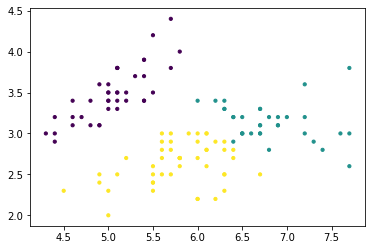

In [60]:
#GMM - Gauian Mixure


iris = datasets.load_iris()
X = iris.data[:, :2] 
y = iris.target
display(X.shape)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

gmm = GaussianMixture(n_components=3,covariance_type='full').fit(X_train)
labels = gmm.predict(X_train)

plt.scatter(X_train[:,0],X_train[:,1],c=labels,s=10,cmap='viridis')
accuracy_score(y_train,labels)


In [ ]:
# gmm = GaussianMixture(n_components=4,covariance_type='tied').fit(X_train)
# labels = gmm.predict(X_train)

# plt.scatter(X_train[:,0],X_train[:,1],c=labels,s=10,cmap='viridis')

In [ ]:
# gmm = GaussianMixture(n_components=4,covariance_type='diag').fit(X_train)
# labels = gmm.predict(X_train)

# plt.scatter(X_train[:,0],X_train[:,1],c=labels,s=10,cmap='viridis')

In [ ]:

# gmm = GaussianMixture(n_components=4,covariance_type='spherical').fit(X_train)
# labels = gmm.predict(X_train)

# plt.scatter(X_train[:,0],X_train[:,1],c=labels,s=10,cmap='viridis')

(111, 2)

(39, 2)

n_classes 3
n_estimators 4


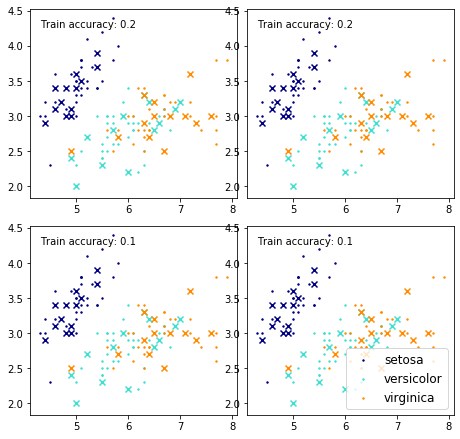

In [56]:
#GMM Iris
from scipy.stats import mode

iris = datasets.load_iris()

skf = StratifiedKFold(n_splits=4)
train_index, test_index = next(iter(skf.split(iris.data, iris.target)))
X_train = iris.data[train_index][:, :2]
y_train = iris.target[train_index]
X_test = iris.data[test_index][:, :2]
y_test = iris.target[test_index]

display(X_train.shape,X_test.shape)

n_classes = len(np.unique(y_train))
print('n_classes',n_classes)


# Try GMMs using different types of covariances.
estimators = {cov_type: GaussianMixture(n_components=n_classes,
              covariance_type=cov_type, max_iter=20, random_state=0)
              for cov_type in ['spherical', 'diag', 'full', 'tied']}

n_estimators = len(estimators)
print('n_estimators',n_estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)

colors = ['navy', 'turquoise', 'darkorange']

for index, (name, estimator) in enumerate(estimators.items()):
    
    h = plt.subplot(2, n_estimators // 2, index + 1)
    
    for n, color in enumerate(colors):
        data = X_train[y_train == n]
        plt.scatter(data[:, 0], data[:, 1], s=2,color=color,
                    label=iris.target_names[n])
    
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)
    
#     # Since we have class labels for the training data, we can
#     # initialize the GMM parameters in a supervised manner.
#     estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
#                                     for i in range(n_classes)])

    estimator.fit(X_train)
    
    
    #make_ellipses(estimator, h)



    y_train_pred = estimator.predict(X_train)
    
    
    labels = np.zeros_like(y_train_pred)
    for i in range(len(colors)):
        mask = (y_train_pred == i)
        #print(mode(y_train_pred[mask]))
        labels[mask] = mode(y_train_pred[mask])[0]
    
    train_accuracy = accuracy_score(y_train,labels)
    #train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
              transform=h.transAxes)

#     y_test_pred = estimator.predict(X_test)
#     test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
#     plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
#              transform=h.transAxes)

#     plt.xticks(())
#     plt.yticks(())
#     plt.title(name)
    

def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')





plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()